In [1]:
from intelligent_placer_lib.loading import load_images
from intelligent_placer_lib.preproccesing import get_contours
from intelligent_placer_lib.spliter import split_contours
from intelligent_placer_lib.placer import place_objects
from intelligent_placer_lib.placer import distance

from intelligent_placer_lib.geometry import shift_geom_to_the_beginning, create_polygons
from shapely.geometry import Polygon
from intelligent_placer_lib.manager import check_image
import cv2
from matplotlib import pyplot as plt
import csv

1.jpg, Мой ответ: True Правильный ответ: True Краткий коммент по тесту: разминочка 


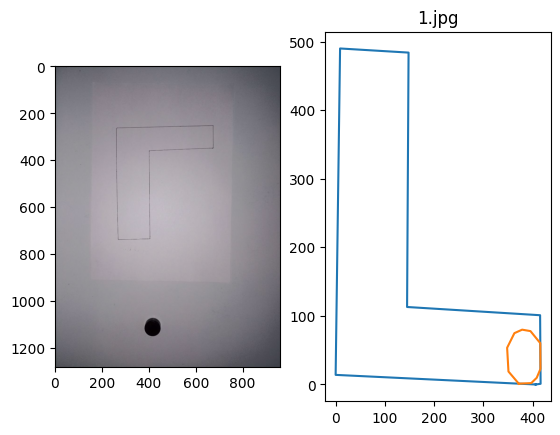

10.jpg, Мой ответ: True Правильный ответ: True Краткий коммент по тесту: обычный тест


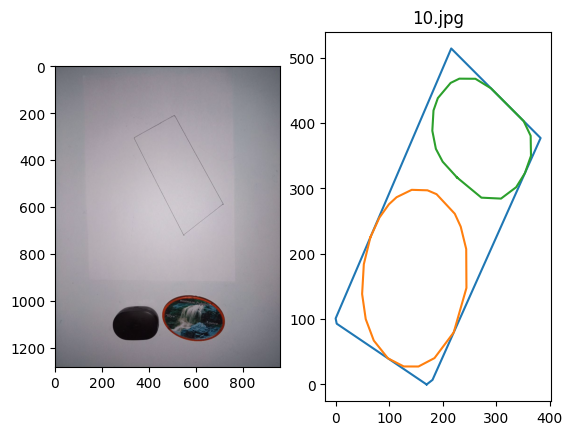

11.jpg, Мой ответ: True Правильный ответ: True Краткий коммент по тесту: невыпуклая фигура каждый предмет помещается в отдельный уголок


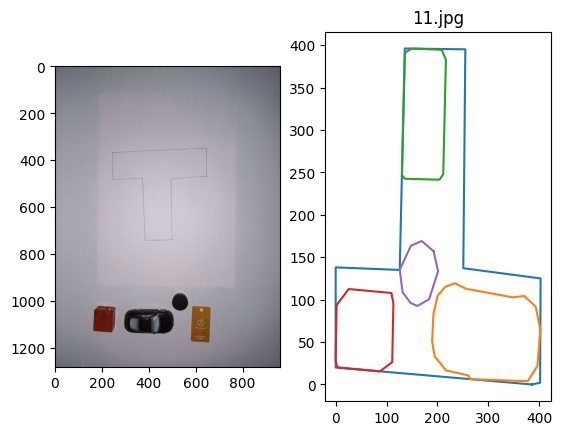

12.jpg, Мой ответ: True Правильный ответ: True Краткий коммент по тесту: обычный тест


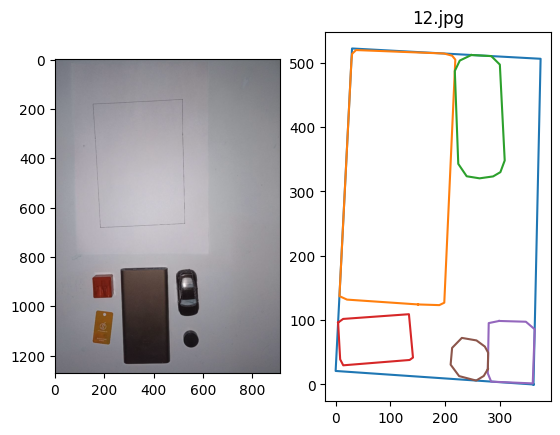

13.jpg, Мой ответ: True Правильный ответ: True Краткий коммент по тесту: 2 маленьких предмета помещаются в маленкую фигуру


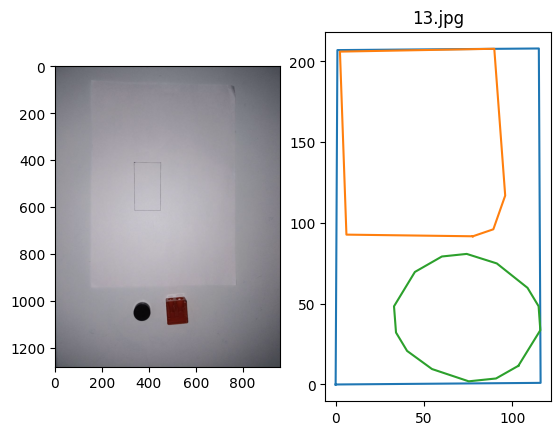

14.jpg, Мой ответ: True Правильный ответ: True Краткий коммент по тесту: один из самых сложных если не самый сложный тест. можно уложить все предметы только если первый будет уложен в опред. местах


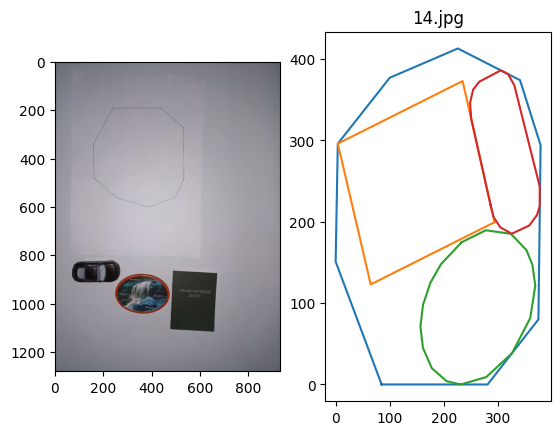

15.jpg, Мой ответ: False Правильный ответ: False Краткий коммент по тесту: 2 больших предмета и большая фигура каждый помещается по отдельности


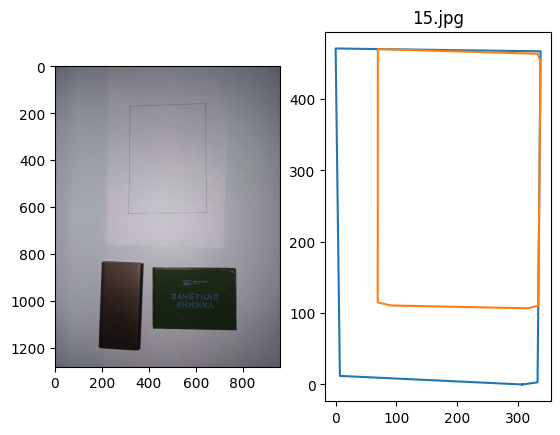

16.jpg, Мой ответ: False Правильный ответ: False Краткий коммент по тесту: третий предмет немного не помещается


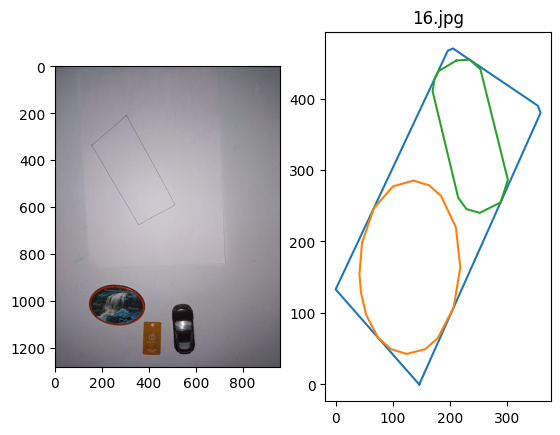

17.jpg, Мой ответ: True Правильный ответ: True Краткий коммент по тесту: разминочный тест)


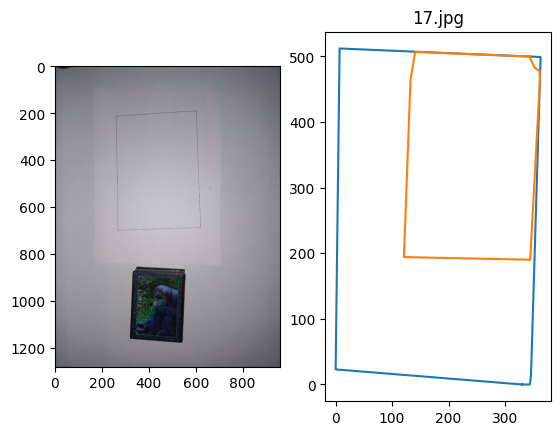

18.jpg, Мой ответ: True Правильный ответ: True Краткий коммент по тесту: разминочный тест


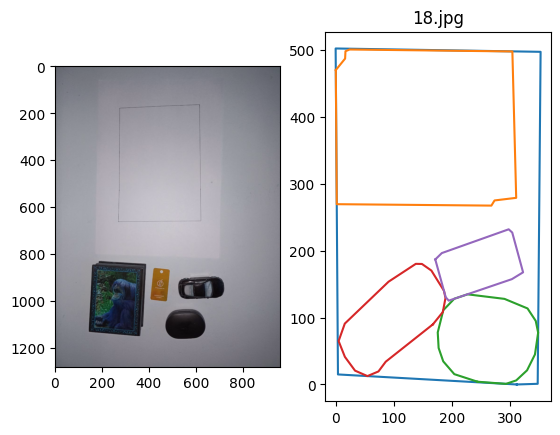

19.jpg, Мой ответ: True Правильный ответ: True Краткий коммент по тесту: предметы помещаются впритык но перспективное искажение мешает разместить(


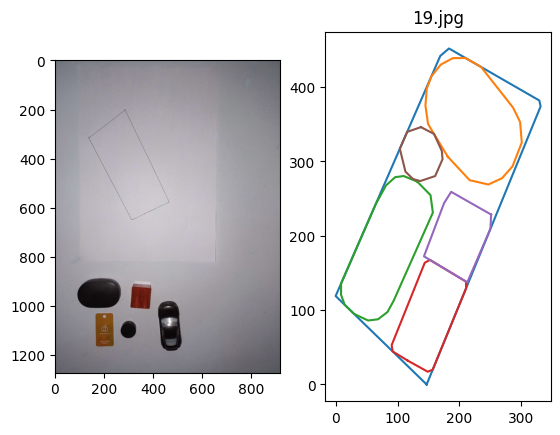

2.jpg, Мой ответ: False Правильный ответ: False Краткий коммент по тесту: разминочный тест тут первая же фигура не помещается в многоугольник не помню зачем так делал)


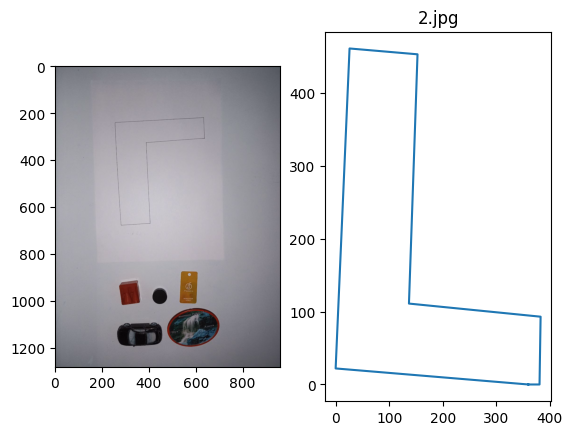

20.jpg, Мой ответ: True Правильный ответ: True Краткий коммент по тесту: предметы помещаются в определенной комбинации в 10угольник


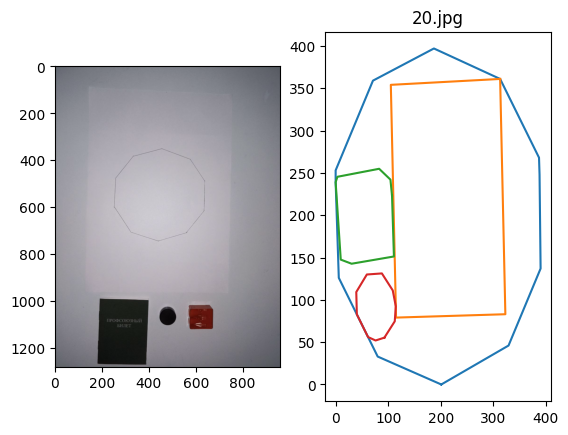

21.jpg, Мой ответ: False Правильный ответ: False Краткий коммент по тесту: 3 предмет не помещается в 10угольник


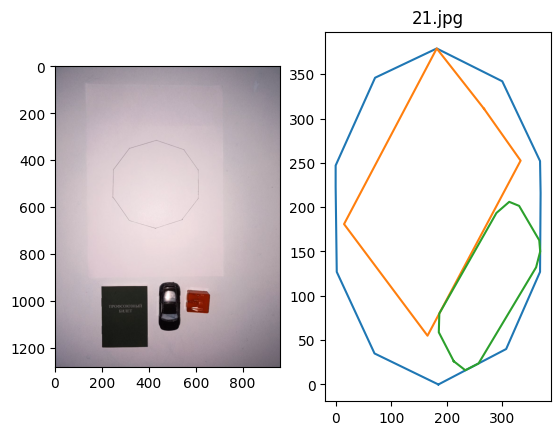

22.jpg, Мой ответ: True Правильный ответ: True Краткий коммент по тесту: 10-угольник


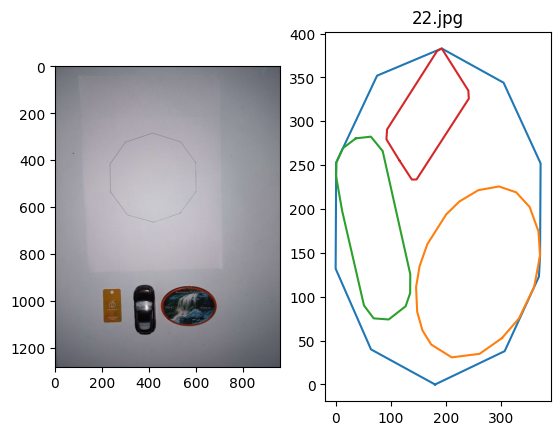

23.jpg, Мой ответ: True Правильный ответ: True Краткий коммент по тесту: усложненная версия 22 теста теперь впритык)


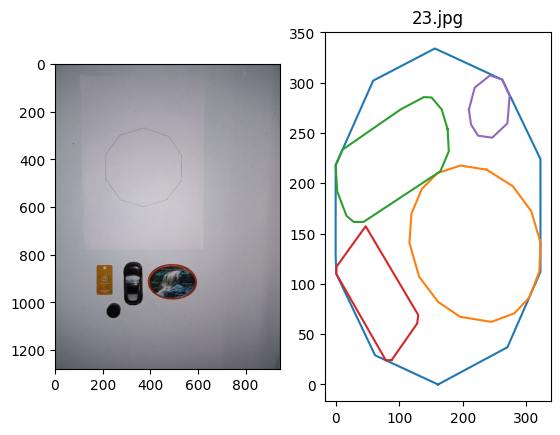

24.jpg, Мой ответ: True Правильный ответ: True Краткий коммент по тесту: только фигура тут размещение ничего в чем-то)


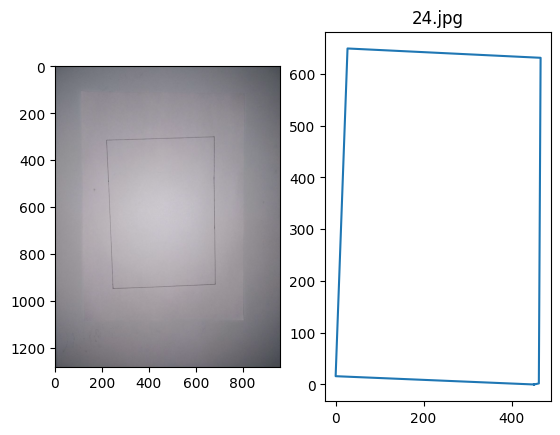

25.jpg, Мой ответ: False Правильный ответ: False Краткий коммент по тесту: ничего вывожу False хотя это философский вопрос размещение ничего в ничего)


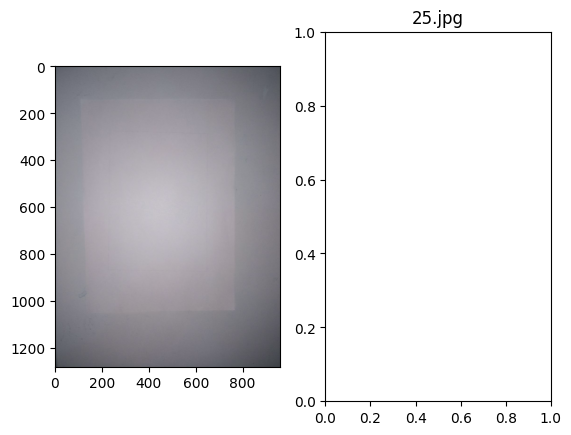

3.jpg, Мой ответ: False Правильный ответ: False Краткий коммент по тесту: предмет не помещается из-за невыпуклости фигуры


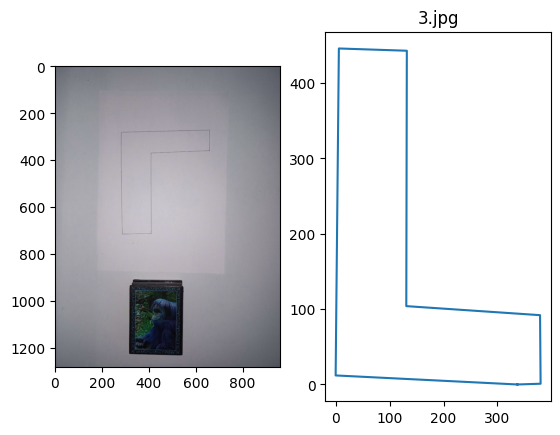

4.jpg, Мой ответ: True Правильный ответ: True Краткий коммент по тесту: маленький предмет и маленькая фигура


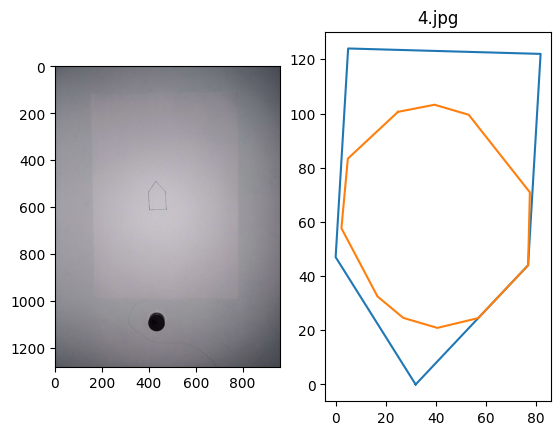

5.jpg, Мой ответ: False Правильный ответ: False Краткий коммент по тесту: маленький предмет и маленькая фигура 


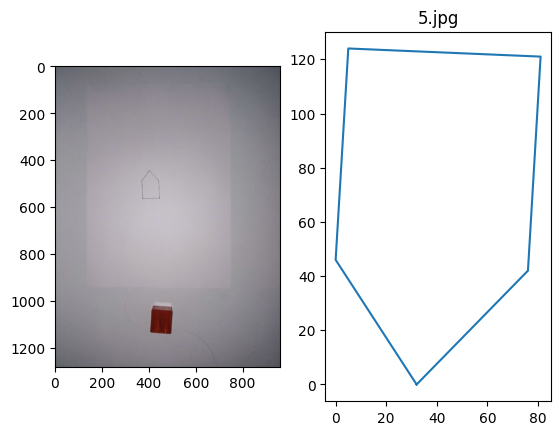

6.jpg, Мой ответ: False Правильный ответ: False Краткий коммент по тесту: 2 маленьких предмета из которых помещается только меньший


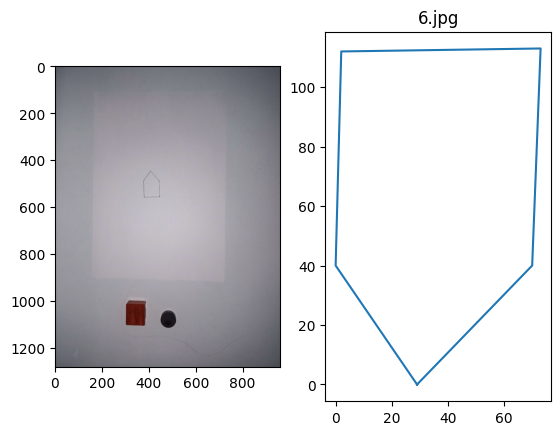

7.jpg, Мой ответ: True Правильный ответ: True Краткий коммент по тесту: помещается только под определенным углом


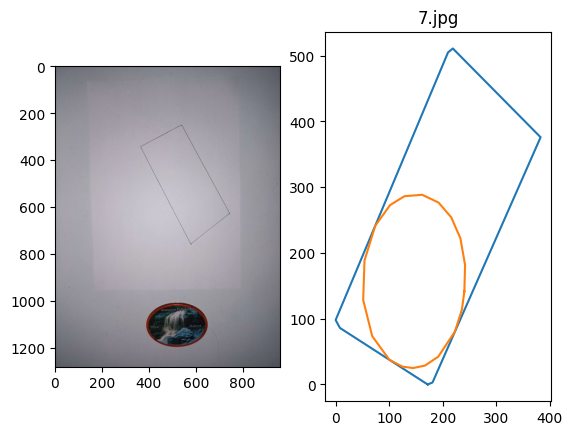

8.jpg, Мой ответ: True Правильный ответ: True Краткий коммент по тесту: обычный тест


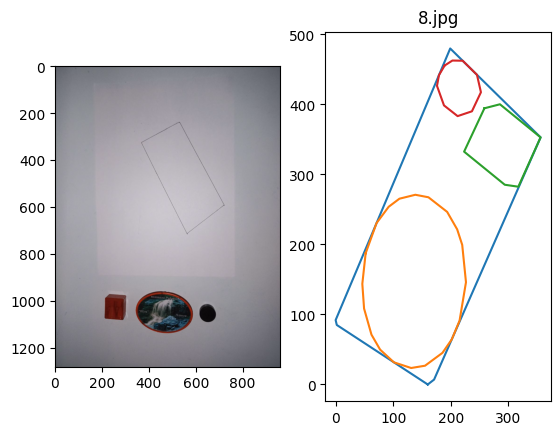

9.jpg, Мой ответ: True Правильный ответ: True Краткий коммент по тесту: помещается только под определенным углом


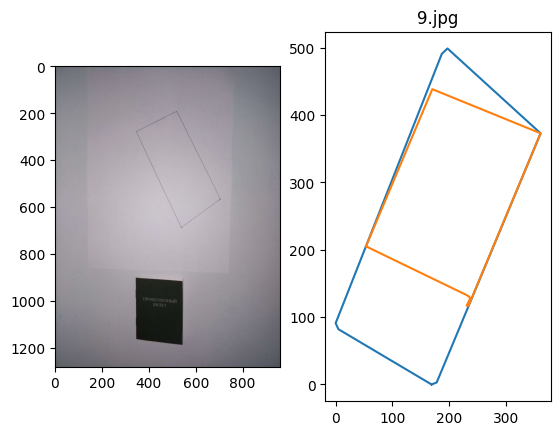

точность ответов: 100.0%


In [4]:
images, name = load_images("images/tests")
i=0
j = 0
count = 0
for im in images:
    
    with open('data.csv', newline='', encoding='utf-8') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',')
        
        for row in spamreader:
            if name[i] == row[0]+'.jpg':
                comment = row[2]
                correct_answer = bool(int(row[1]))
    
    answer, poly, objects_in_poly = check_image(im)
    count+=(correct_answer==answer)
    fig, ax = plt.subplots(1, 2)
    print(f'{name[i]}, Мой ответ: {answer} Правильный ответ: {correct_answer} Краткий коммент по тесту:{comment}')
    plt.title(name[i])
    ax[0].imshow(im)
    i+=1
    if  poly == None:
        plt.show()
        continue
    ax[1].plot(*poly.exterior.xy)
    for o in objects_in_poly:
        ax[1].plot(*o.exterior.xy)
    plt.show()
    
print(f'точность ответов: {100*count/len(images)}%')


In [ ]:
#Тут я получил точность ответов 100 процентов, но это далеко не так, 14 тест где-то в 2 из 3 случаев выдает верный 
#результат, а 19-ый в 1 из 4. Из-за случайности differential_evolution